# Dimer of two identical subunits #
This notebook goes through simulation and optimization of two simple systems, a dimer with two unique subunits,
and a fully connected trimer with unique subunits. It's purpose is to demonstrate the optimizer, confirm that the simulator
works as expected, and see if we can see any interesting kinetic effects in the simplest systems.

In summary, we do not see trapping, nor any pre equilibrium optimizability (as seen with AP2) in either the trimer or dimer.

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
import torch

sys.path.append("../../")
import copy
import numpy as np

In [2]:
from steric_free_simulator import Optimizer
from steric_free_simulator import VectorizedRxnNet
from steric_free_simulator import EquilibriumSolver

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x7f27c8f1db70>


<h2> Load basic dimer info </h2>
Specifies reaction A + B <--> AB, with starting with 2000 copies of A and 1000 copies of B.

In [7]:
# base_input = '../input_files/identical_dimer.pwr'
# rn = ReactionNetwork(base_input, one_step=True)
# rn.resolve_tree()

# Specify Manually for vec sim test skipping net evaluation
M = torch.DoubleTensor([[-2, 2],
                        [1, -1]])
copies_vec = torch.DoubleTensor([100, 0])
kon = torch.DoubleTensor([1.])
rxn_score_vec = torch.DoubleTensor([100.])
conditions = {'M':M,
              'kon':kon,
              'copies_vec':copies_vec,
              'rxn_score_vec': rxn_score_vec,
              'num_monomers': 1}
rn = VectorizedRxnNet(conditions)

Vectorized Network Conditions Are Being Set Manually....


<h2>Create an optimizer object to attempt to optimize this reaction network</h2>
Since we are running vectorized simulations here, the reaction network will be transformed into a matrix representation.

In [8]:
rn.reset()
optim = Optimizer(reaction_network=rn,
                  sim_runtime=1,
                  optim_iterations=1,
                  learning_rate=.1)
#optim.rn.update_reaction_net(rn)

Using CPU


In [9]:
vec_rn = optim.optimize()

Using CPU
yield on sim iteration 0 was 46.5%
optimization complete


<h3> Plot the simulation at the first iteration (before optimization) </h3>

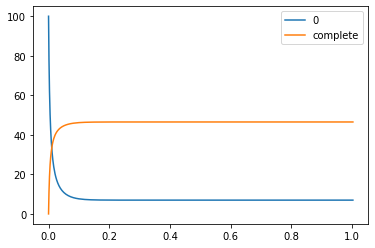

In [10]:
optim.plot_observable(iteration=0)


<h3> Plot the simulation at the last iteration (after all optimization) </h3>

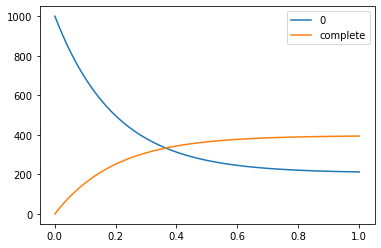

In [8]:
optim.plot_observable(iteration=-1)


<h3> Plot the yield curve over all iterations </h3>

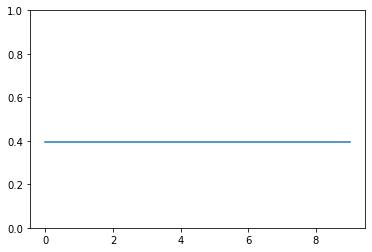

In [9]:
optim.plot_yield()

In [10]:
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve()
print(solution)
print("Equilibrium expected yield: ", solution[-1] / min(optim.rn.initial_copies[:optim.rn.num_monomers]))

AttributeError: 'VectorizedRxnNet' object has no attribute 'network'

<h3> Summary of dimer test</h3>
The dimer model, reaches the same equilbrium regardless of the parameters, and the equilibrium found with the simulator
matches the theoretical equilibrium solution. We do not observe any trapping or other interesting kinetic effects.

In [11]:
# A, B -- > BAB
# Specify Manually for vec sim test skipping net evaluation
M = torch.DoubleTensor([[-1, 0, 1, 0],
                        [-1, -1, 1, 1],
                        [1, -1, -1, 1],
                        [0, 1, 0, -1]])
copies_vec = torch.DoubleTensor([75, 100, 0, 0])
kon = torch.DoubleTensor([1., 1.])
rxn_score_vec = torch.DoubleTensor([-500., 100.])
conditions = {'M':M,
              'kon':kon,
              'copies_vec':copies_vec,
              'rxn_score_vec': rxn_score_vec,
              'num_monomers': 2}
rn = VectorizedRxnNet(conditions)

Vectorized Network Conditions Are Being Set Manually....


In [18]:
rn.reset()
optim = Optimizer(reaction_network=rn,
                  sim_runtime=.6,
                  optim_iterations=1,
                  learning_rate=.1)

Using CPU


In [19]:
vec_rn = optim.optimize()

Using CPU
yield on sim iteration 0 was 49.0%
optimization complete


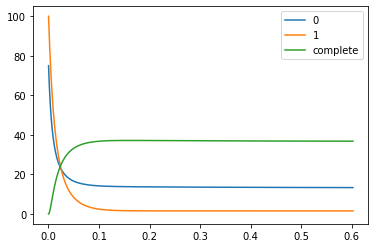

In [20]:
optim.plot_observable(iteration=-1)